# Ajinkya Kulkarni

Problem Statement:
Now a days laptops are very demanding in market and so many company are competitors. They are providing high features in less price to compete with other companies.
In this dataset we sre predicting price with help of so many features like RAM,screenresolution,company and many more to predict price.

In [1]:
# import libraries
import pandas as pd
import numpy as np

# scikit library for linear regression
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, KFold

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import pylab

from sklearn.metrics import mean_squared_error
import re

In [2]:
## read the data
data=pd.read_csv(r"C:\Users\Admin\Ajinkya projects\Laptop-Price-Prediction-main\laptops.csv",encoding='unicode_escape')

In [3]:
df=data

In [4]:
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
df.shape#checking shape of data

(1303, 13)

In [6]:
#Checking info of data to check data types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [7]:
# From above also we get to know that missing values in dataset are zero
# But we also again check by using isnull function
df.isnull().sum()

Unnamed: 0          0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [9]:
# As from data set we get to know that there is no requirement for "unnamed:0" column so we will drop that column
# Also price is decided on basis of brand and features so we don't required product column also
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('Product',axis=1,inplace=True)

In [10]:
df.shape

(1303, 11)

# EDA

As from above dataset we get to know that there are so many column having hidden information like in screen resolution we get to know that resolution of screen also display is ips or not.
Also in GPU section we will get company and size of GPU. SO we will do data cleaning and feature engineering on dataset

In [11]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

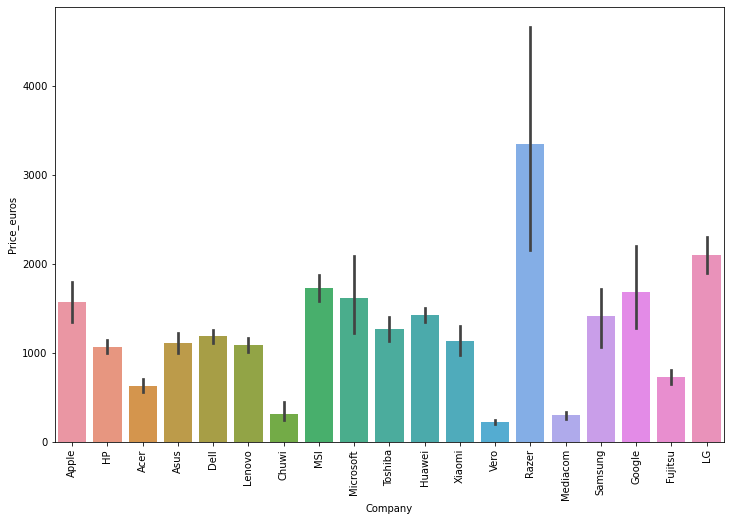

In [12]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['Company'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

As from above plot we get to know that highest prices of laptop are of "Razer" company,after that "MSI","LG","Google" are the expensive ones.

<AxesSubplot:>

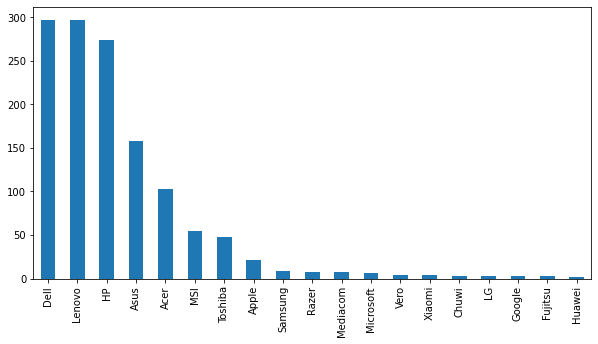

In [13]:
plt.figure(figsize=(10,5)),
df.Company.value_counts().plot(kind='bar')

In dataset we have maximum number of observations of brand "Lenevo","Dell","Hp"

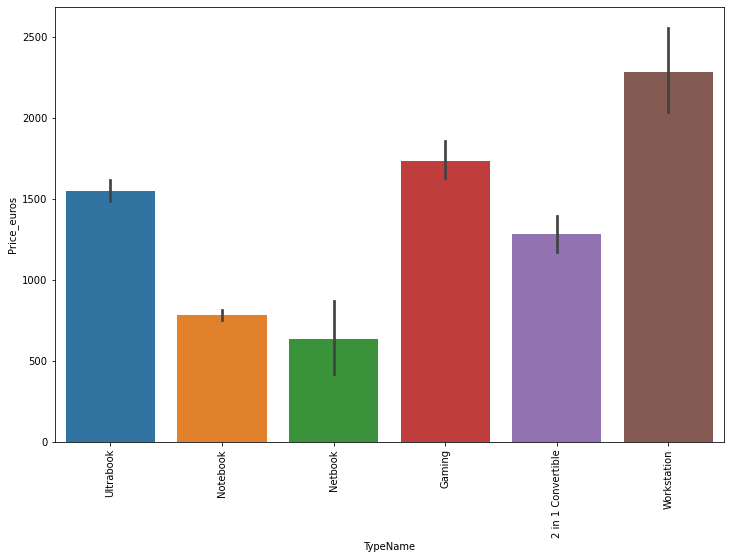

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['TypeName'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [15]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In dataset Ram and weight column are object due to "GB" and "kg" text. so we will remove them

In [16]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

But we just remove text only and we have to change column data type  of both column to int

In [17]:
df['Ram']=df.Ram.astype('int32')
df['Weight']=df.Ram.astype('int32')

In [18]:
#Here we checking data type get changed or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   int32  
 10  Price_euros       1303 non-null   float64
dtypes: float64(2), int32(2), object(7)
memory usage: 101.9+ KB


In [19]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,8,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,8,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,8,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,16,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,8,1803.60


Here we are creating two new column to takeout specific information like laptop is Touchscreen & IPS or not

In [20]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [21]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,8,1339.69,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,8,898.94,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,8,575.00,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,16,2537.45,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,8,1803.60,0,1


Here I have created one function to remove unncessary text from screenresolution column

In [22]:
# Create a pattern to filter
remove_bad_symbols1 = re.compile('[^0-9x0-9]')

def clean_text(text):
    #lowercase text
    text = text.lower() 
    # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing.
    text = remove_bad_symbols1.sub('', text)  
    return text

In [23]:
# Clean the data set
df['ScreenResolution'] = df['ScreenResolution'].apply(clean_text)

In [24]:
df['ScreenResolution'].nunique()

15

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


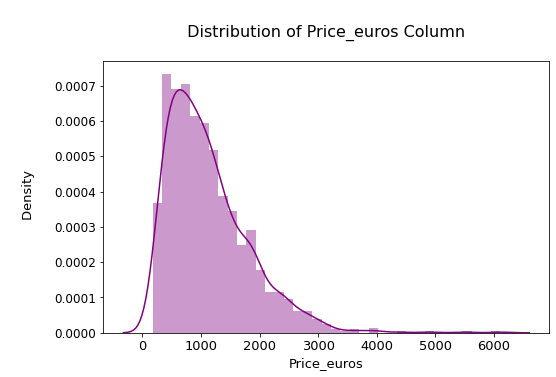

In [25]:
# Lets look at how the 'Price_euros' column is distributed:

plt.figure(figsize=(8,5))
plt.title('\n Distribution of Price_euros Column \n', size=16, color='black')
plt.xlabel('\n Price_euros \n', fontsize=13, color='black')
plt.ylabel('\n Density\n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
sns.distplot(df.Price_euros,color="purple")
plt.show()

From above plot we get to know column price_euros is right skewed and also another thing is max price of laptop is between 500 to 1500 euros.

In [26]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros', 'Touchscreen',
       'IPS'],
      dtype='object')

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

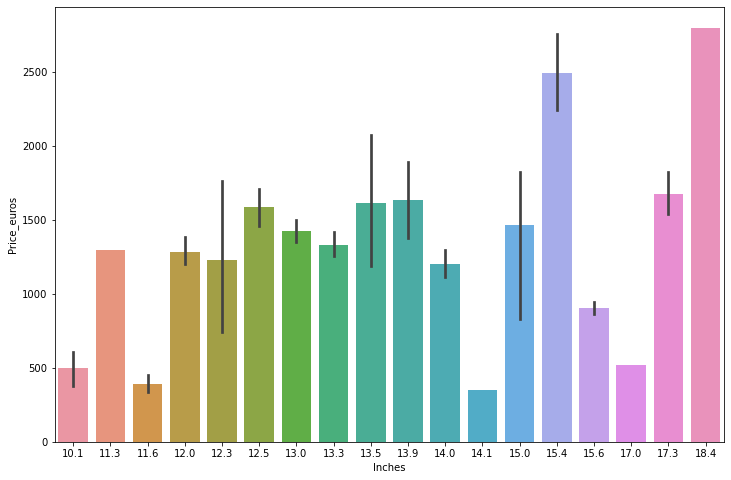

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['Inches'],y=df['Price_euros'])

# As we clearly see as size of inches gets increased then price of laptops also get increased.But price only gets increased after only 15.0 inches

In [28]:
# We can also check how many are the touchscreen laptops in dataset
df.Touchscreen.value_counts()
# There are less touchscreen lapops in dataset 

0    1111
1     192
Name: Touchscreen, dtype: int64

<AxesSubplot:xlabel='Touchscreen', ylabel='Price_euros'>

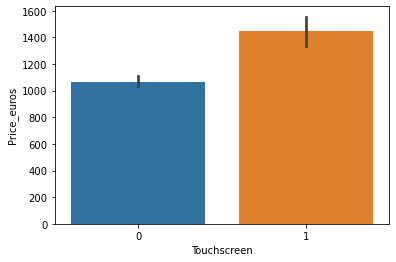

In [29]:
# we will check relation of touchscreen laptop with price
sns.barplot(x=df['Touchscreen'],y=df['Price_euros'])

# laptop having touchscreen feature has higher price as compared to non-touchscreen 

<AxesSubplot:xlabel='IPS', ylabel='Price_euros'>

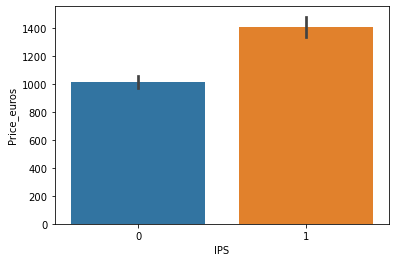

In [30]:
# we will check relation of IPS laptop with price
sns.barplot(x=df['IPS'],y=df['Price_euros'])

# laptop having IPS feature has higher price as compared to non-IPS 

# As we know mainly RAM is key factor while we select the laptop and according to that price of laptop also changed. So we check relation of RAM and price

In [31]:
df.Ram.value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

<AxesSubplot:xlabel='Ram', ylabel='Price_euros'>

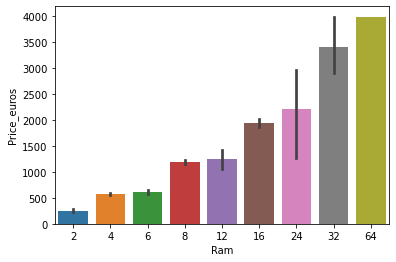

In [32]:
sns.barplot(x=df["Ram"],y=df["Price_euros"])

As expected price of laptop get increase as RAM gets increased

In [33]:
df['CPU'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [34]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [35]:
df['CPU brand'] = df['CPU'].apply(fetch_processor)

In [36]:
df['CPU brand'] .value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: CPU brand, dtype: int64

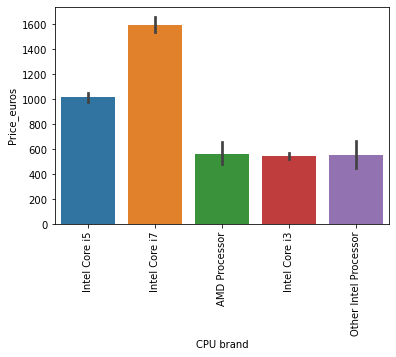

In [37]:
sns.barplot(x=df['CPU brand'],y=df['Price_euros'])
plt.xticks(rotation = "vertical")
plt.show()

In [38]:
df.drop(columns = "CPU",inplace=True)
df.drop(columns = "Cpu",inplace=True)

In [39]:
df["Memory"]

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object

In [40]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

In [41]:
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()


In [42]:
df['first']

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: first, Length: 1303, dtype: object

In [43]:
df["second"]= new[1]

In [44]:
df['first'].value_counts()

256 SSD              500
1000 HDD             225
128 SSD              172
512 SSD              138
500 HDD              132
32 Flash Storage      38
2000 HDD              16
64 Flash Storage      16
1000 SSD              16
1000 Hybrid            9
256 Flash Storage      8
16 Flash Storage       7
32 SSD                 6
180 SSD                5
128 Flash Storage      4
16 SSD                 3
512 Flash Storage      2
240 SSD                1
8 SSD                  1
64 SSD                 1
508 Hybrid             1
32 HDD                 1
128 HDD                1
Name: first, dtype: int64

In [45]:
df["second"].value_counts()

  1000 HDD       185
  2000 HDD        15
  256 SSD          3
  500 HDD          2
  1000 Hybrid      2
  512 SSD          1
Name: second, dtype: int64

In [46]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [47]:
df['first'].value_counts()

256 SSD              500
1000 HDD             225
128 SSD              172
512 SSD              138
500 HDD              132
32 Flash Storage      38
2000 HDD              16
64 Flash Storage      16
1000 SSD              16
1000 Hybrid            9
256 Flash Storage      8
16 Flash Storage       7
32 SSD                 6
180 SSD                5
128 Flash Storage      4
16 SSD                 3
512 Flash Storage      2
240 SSD                1
8 SSD                  1
64 SSD                 1
508 Hybrid             1
32 HDD                 1
128 HDD                1
Name: first, dtype: int64

In [48]:
df['first'] = df['first'].str.replace(r'\D', '')

<ipython-input-48-3a46925974fa>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')


In [49]:
df["second"].fillna("0", inplace = True)

In [50]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')


<ipython-input-50-6ad81d0a1f79>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [51]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [52]:

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])


In [53]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [54]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,CPU brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,8,1339.69,0,1,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,8,898.94,0,0,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,8,575.00,0,0,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,16,2537.45,0,1,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,8,1803.60,0,1,Intel Core i5,0,256,0,0


In [55]:
df.drop(columns=['Memory','Hybrid','Flash_Storage'],inplace=True)

In [56]:
df.shape

(1303, 14)

In [57]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,CPU brand,HDD,SSD
0,Apple,Ultrabook,13.3,2560x1600,8,Intel Iris Plus Graphics 640,macOS,8,1339.69,0,1,Intel Core i5,0,128
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,8,898.94,0,0,Intel Core i5,0,0
2,HP,Notebook,15.6,1920x1080,8,Intel HD Graphics 620,No OS,8,575.00,0,0,Intel Core i5,0,256
3,Apple,Ultrabook,15.4,2880x1800,16,AMD Radeon Pro 455,macOS,16,2537.45,0,1,Intel Core i7,0,512
4,Apple,Ultrabook,13.3,2560x1600,8,Intel Iris Plus Graphics 650,macOS,8,1803.60,0,1,Intel Core i5,0,256


# We will take out only brands name from GPU column

In [58]:
#Gpu
df.Gpu.value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon Pro 455           1
AMD Radeon RX 560            1
AMD Radeon R7 Graphics       1
ARM Mali T860 MP4            1
AMD Radeon Pro 560           1
Name: Gpu, Length: 110, dtype: int64

In [59]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [60]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,CPU brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,13.3,2560x1600,8,Intel Iris Plus Graphics 640,macOS,8,1339.69,0,1,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,macOS,8,898.94,0,0,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,1920x1080,8,Intel HD Graphics 620,No OS,8,575.00,0,0,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,2880x1800,16,AMD Radeon Pro 455,macOS,16,2537.45,0,1,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,2560x1600,8,Intel Iris Plus Graphics 650,macOS,8,1803.60,0,1,Intel Core i5,0,256,Intel


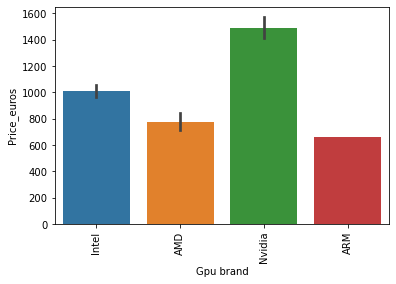

In [61]:
sns.barplot(x=data['Gpu brand'],y=data['Price_euros'])
plt.xticks(rotation = "vertical")
plt.show()

In [62]:
df = df[df['Gpu brand'] != 'ARM']

# As from above graph we get to know that laptop having Nvidia graphics higher price later intel and others

In [63]:
df.drop('Gpu',axis=1,inplace=True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [64]:
df.Company.nunique()

19

In [65]:
df.OpSys.value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [66]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [67]:
df['os'] = df['OpSys'].apply(cat_os)

<ipython-input-67-38671a3c07bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df['OpSys'].apply(cat_os)


In [68]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,CPU brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,13.3,2560x1600,8,macOS,8,1339.69,0,1,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,1440x900,8,macOS,8,898.94,0,0,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,1920x1080,8,No OS,8,575.00,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,2880x1800,16,macOS,16,2537.45,0,1,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,2560x1600,8,macOS,8,1803.60,0,1,Intel Core i5,0,256,Intel,Mac


In [69]:
df.drop('OpSys',axis=1,inplace=True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


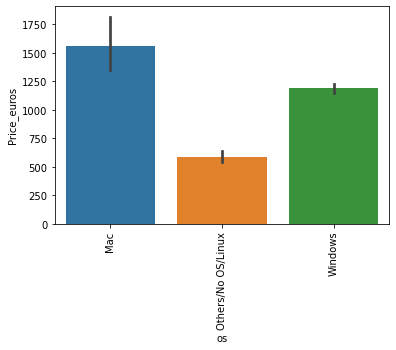

In [70]:
sns.barplot(x=df['os'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

# Mac OS having higher price than other laptops

In [71]:
df.describe() # Here we will check statistical summary

,Inches,Ram,Weight,Price_euros,Touchscreen,IPS,HDD,SSD
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.00000,1302.000000,1302.000000
mean,15.019278,8.385561,8.385561,1124.043894,0.146697,0.27957,414.101382,183.874040
std,1.424861,5.085166,5.085166,699.158856,0.353940,0.44896,515.889348,186.969314
min,10.100000,2.000000,2.000000,174.000000,0.000000,0.00000,0.000000,0.000000
25%,14.000000,4.000000,4.000000,599.000000,0.000000,0.00000,0.000000,0.000000
50%,15.600000,8.000000,8.000000,978.000000,0.000000,0.00000,0.000000,256.000000
75%,15.600000,8.000000,8.000000,1488.435000,0.000000,1.00000,1000.000000,256.000000
max,18.400000,64.000000,64.000000,6099.000000,1.000000,1.00000,2000.000000,1024.000000


In [72]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Ram', 'Weight',
       'Price_euros', 'Touchscreen', 'IPS', 'CPU brand', 'HDD', 'SSD',
       'Gpu brand', 'os'],
      dtype='object')

In [73]:
df.ScreenResolution.nunique()

15

# We have Screensresolution column in object form we will convert that column in integer by creating two columns

In [74]:
df['X_res']=df.ScreenResolution.str.split('x',expand=True)[0]
df['X_res']

<ipython-input-74-c7682a289477>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['X_res']=df.ScreenResolution.str.split('x',expand=True)[0]


0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: X_res, Length: 1302, dtype: object

In [75]:
df['Y_res']=df.ScreenResolution.str.split('x',expand=True)[1]
df['Y_res']

<ipython-input-75-2386fb3315a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y_res']=df.ScreenResolution.str.split('x',expand=True)[1]


0       1600
1        900
2       1080
3       1800
4       1600
        ... 
1298    1080
1299    1800
1300     768
1301     768
1302     768
Name: Y_res, Length: 1302, dtype: object

In [76]:
df.drop('ScreenResolution',axis=1,inplace=True)

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [77]:
df["X_res"] = df["X_res"].astype(float)
df["Y_res"] = df["Y_res"].astype(float)

<ipython-input-77-894f121a4e5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["X_res"] = df["X_res"].astype(float)
<ipython-input-77-894f121a4e5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Y_res"] = df["Y_res"].astype(float)


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Inches       1302 non-null   float64
 3   Ram          1302 non-null   int32  
 4   Weight       1302 non-null   int32  
 5   Price_euros  1302 non-null   float64
 6   Touchscreen  1302 non-null   int64  
 7   IPS          1302 non-null   int64  
 8   CPU brand    1302 non-null   object 
 9   HDD          1302 non-null   int64  
 10  SSD          1302 non-null   int64  
 11  Gpu brand    1302 non-null   object 
 12  os           1302 non-null   object 
 13  X_res        1302 non-null   float64
 14  Y_res        1302 non-null   float64
dtypes: float64(4), int32(2), int64(4), object(5)
memory usage: 184.9+ KB


In [79]:
df_numeric=df.select_dtypes(include=np.number)

In [80]:
df_categorical=df.select_dtypes(include= object)

In [81]:
dummy_encoded_variables = pd.get_dummies(df_categorical, drop_first = True)

In [82]:
dummy_encoded_variables.head()

,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,...,TypeName_Ultrabook,TypeName_Workstation,CPU brand_Intel Core i3,CPU brand_Intel Core i5,CPU brand_Intel Core i7,CPU brand_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0


In [83]:
# concatenate the numerical and dummy encoded categorical variables column-wise
df1 = pd.concat([df_numeric, dummy_encoded_variables], axis=1)

# display data with dummy variables
df1.head()

,Inches,Ram,Weight,Price_euros,Touchscreen,IPS,HDD,SSD,X_res,Y_res,...,TypeName_Ultrabook,TypeName_Workstation,CPU brand_Intel Core i3,CPU brand_Intel Core i5,CPU brand_Intel Core i7,CPU brand_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows
0,13.3,8,8,1339.69,0,1,0,128,2560.0,1600.0,...,1,0,0,1,0,0,1,0,0,0
1,13.3,8,8,898.94,0,0,0,0,1440.0,900.0,...,1,0,0,1,0,0,1,0,0,0
2,15.6,8,8,575.00,0,0,0,256,1920.0,1080.0,...,0,0,0,1,0,0,1,0,1,0
3,15.4,16,16,2537.45,0,1,0,512,2880.0,1800.0,...,1,0,0,0,1,0,0,0,0,0
4,13.3,8,8,1803.60,0,1,0,256,2560.0,1600.0,...,1,0,0,1,0,0,1,0,0,0


In [84]:
df1.shape

(1302, 41)

In [85]:
df1=sm.add_constant(df1)
X=df1.drop("Price_euros",axis=1)
y=df[['Price_euros']]

In [86]:
X.head()

,const,Inches,Ram,Weight,Touchscreen,IPS,HDD,SSD,X_res,Y_res,...,TypeName_Ultrabook,TypeName_Workstation,CPU brand_Intel Core i3,CPU brand_Intel Core i5,CPU brand_Intel Core i7,CPU brand_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows
0,1.0,13.3,8,8,0,1,0,128,2560.0,1600.0,...,1,0,0,1,0,0,1,0,0,0
1,1.0,13.3,8,8,0,0,0,0,1440.0,900.0,...,1,0,0,1,0,0,1,0,0,0
2,1.0,15.6,8,8,0,0,0,256,1920.0,1080.0,...,0,0,0,1,0,0,1,0,1,0
3,1.0,15.4,16,16,0,1,0,512,2880.0,1800.0,...,1,0,0,0,1,0,0,0,0,0
4,1.0,13.3,8,8,0,1,0,256,2560.0,1600.0,...,1,0,0,1,0,0,1,0,0,0


In [87]:
y.head()

,Price_euros
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60


In [88]:
# split data into train data and test data 
# what proportion of data should be included in test data is passed using 'test_size'
# set 'random_state' to get the same data each time the code is executed 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1041, 41)
The shape of X_test is: (261, 41)
The shape of y_train is: (1041, 1)
The shape of y_test is: (261, 1)


# OLS

In [89]:
# build a full model using OLS()
# consider the log of sales price as the target variable
# use fit() to fit the model on train data
OLS = sm.OLS(y_train, X_train).fit()

# print the summary output
print(OLS.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_euros   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     87.66
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          1.95e-288
Time:                        01:28:30   Log-Likelihood:                -7527.0
No. Observations:                1041   AIC:                         1.513e+04
Df Residuals:                    1002   BIC:                         1.532e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [90]:
OLS_predictions = OLS.predict(X_test)
OLS_predictions

1233    1949.538991
1030     832.463152
163     1870.711175
1012     925.149095
711      855.052775
           ...     
1277     201.012867
1232     614.898235
951     1366.743653
1245    1796.458895
62       812.998382
Length: 261, dtype: float64

In [91]:
actual_price = y_test["Price_euros"]
actual_price

1233    1598.00
1030     973.00
163     1079.00
1012    1590.00
711     1089.00
         ...   
1277     289.00
1232     469.01
951     1775.00
1245    1600.00
62       599.00
Name: Price_euros, Length: 261, dtype: float64

In [92]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [93]:
# calculate rmse using rmse()
OLS_RMSE = rmse(actual_price,OLS_predictions )

# calculate R-squared using rsquared
OLS_R_Squared = OLS.rsquared

# calculate Adjusted R-Squared using rsquared_adj
OLS_R_Squared_Adj = OLS.rsquared_adj 

In [94]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE, R-squared value and Adjusted R-squared value
# create a list of column names
cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_full_metrics = pd.Series({'Model': "OLS",
                     'RMSE':OLS_RMSE,
                     'R-Squared': OLS_R_Squared,
                     'Adj. R-Squared': OLS_R_Squared_Adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,OLS,343.885142,0.768752,0.759982


# Linear Regression

In [95]:
# importing library min max scaler to scale data
from sklearn.preprocessing import MinMaxScaler
#import library for implement Linear Regression
from sklearn.linear_model import SGDRegressor 
from sklearn.metrics import mean_squared_error
from math import sqrt
# from sklearn.preprocessing import StandardScaler

In [96]:
scaler= MinMaxScaler()

In [97]:
X1=scaler.fit_transform(X)

In [98]:
X1

array([[0.        , 0.38554217, 0.09677419, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.38554217, 0.09677419, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.6626506 , 0.09677419, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.46987952, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.6626506 , 0.06451613, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.6626506 , 0.03225806, ..., 0.        , 0.        ,
        1.        ]])

In [99]:
y1=y

In [100]:
# split data into train data and test data 
# what proportion of data should be included in test data is passed using 'test_size'
# set 'random_state' to get the same data each time the code is executed 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X1_train is:",X1_train.shape)

# print dimension of predictors test set
print("The shape of X1_test is:",X1_test.shape)

# print dimension of target train set
print("The shape of y1_train is:",y1_train.shape)

# print dimension of target test set
print("The shape of y1_test is:",y1_test.shape)

The shape of X1_train is: (1041, 41)
The shape of X1_test is: (261, 41)
The shape of y1_train is: (1041, 1)
The shape of y1_test is: (261, 1)


In [101]:
# build the model
SGD_model = SGDRegressor(loss="squared_loss",alpha = 0.1, max_iter = 3000) #Instantiation

# fit the model
SGD_model.fit(X1_train, y1_train) #Training

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDRegressor(alpha=0.1, max_iter=3000)

In [102]:
# predict the values
y1_pred_SGD  = SGD_model.predict(X1_test)
y1_pred_SGD

array([1706.92146432,  853.16161784, 1790.49834701,  909.80379112,
        855.37648157, 1211.97835328,  522.96808997,  815.98778056,
        579.61026325, 1486.50062672,  923.10046651,  999.49684178,
       1589.85395705, 1681.39699136,  631.31952787, 1673.92219812,
       1269.61918458,  842.15546311, 1522.12665423,  875.75896291,
       1318.43887269, 1193.13584311, 1698.76282164, 1718.91098313,
        707.5258769 , 1163.96161949,  811.00609772,  643.09115917,
        991.73816112, 1316.14754248,  580.39591056,  538.93388914,
        921.82066515, 1483.84090258,  705.25699841,  807.87094361,
        784.24195178,  587.86274765, 1261.6469757 , 1774.4310993 ,
       1215.83953095,  656.12183306,  947.9883477 , 1206.3781162 ,
       1269.61918458, 1705.62627372,  754.97571947, 1753.37141947,
        906.95700592, 1710.44458958,  602.86090506, 1539.37081569,
        726.25795216, 1309.5995359 , 1280.2445707 , 1757.58011652,
       1332.77328675, 1622.22350926, 1503.28414406, 1051.15102

In [103]:
r_squared_SGD = SGD_model.score(X1_train,y1_train)
# Number of observation or sample size
n = 1041 

# No of independent variables
p = 41

#Compute Adj-R-Squared
Adj_r_squared_SGD = 1 - (1-r_squared_SGD)*(n-1)/(n-p-1)

# Compute RMSE
rmse_SGD = sqrt(mean_squared_error(y1_test, y1_pred_SGD))


In [104]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Linear regression with SGD ",
                     'RMSE':rmse_SGD,
                     'R-Squared': r_squared_SGD,
                     'Adj. R-Squared': Adj_r_squared_SGD     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,OLS,343.885142,0.768752,0.759982
1,Linear regression with SGD,454.599736,0.615322,0.599535


# Decision Tree

In [105]:
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [106]:
# instantiate the 'DecisionTreeRegressor' object using 'mse' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree = DecisionTreeRegressor(criterion = 'mse', random_state = 10) #Max depth D.Tree gets formed

# fit the model using fit() on train data
decision_tree_model = decision_tree.fit(X_train, y_train) #fit() method is defined inside the class 'DecisionTreeClassifier'

In [107]:
y_pred_DT=decision_tree_model.predict(X_test)

In [108]:
y_pred_DT

array([2025.38571429, 1099.99      , 1305.        , 1152.495     ,
        677.35      ,  849.        ,  292.5       ,  597.57      ,
        292.5       , 1488.99      ,  960.        , 1177.25      ,
       2899.        , 1438.        ,  481.98      , 1339.        ,
       1449.9       ,  699.        , 1187.        , 1240.        ,
       1419.45      ,  979.        , 1468.        , 1149.        ,
        298.5       , 1396.        ,  498.        ,  539.        ,
        960.        , 1429.        ,  581.785     ,  398.99      ,
        699.        , 2339.        ,  769.        ,  711.495     ,
        805.99      ,  462.35      , 1399.        , 2884.86      ,
       1336.5       ,  489.9       ,  699.        ,  689.        ,
       1449.9       , 2774.63      , 1055.        , 1499.        ,
        597.        , 4389.        ,  355.        , 1149.        ,
        689.        , 1197.        , 2277.        , 1769.        ,
       1499.        , 1231.285     , 1169.        ,  884.     

In [109]:
r_squared_DT=decision_tree_model.score(X_test,y_test)
# Number of observation or sample size
n = 1041 

# No of independent variables
p = 41

#Compute Adj-R-Squared
Adj_r_squared_DT = 1 - (1-r_squared_DT)*(n-1)/(n-p-1)
Adj_r_squared_DT

0.6511333335923726

In [110]:
# Compute RMSE
rmse_DT = sqrt(mean_squared_error(y_test, y_pred_DT))

In [111]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Decision Tree Model ",
                     'RMSE':rmse_DT,
                     'R-Squared': r_squared_DT,
                     'Adj. R-Squared': Adj_r_squared_DT     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,OLS,343.885142,0.768752,0.759982
1,Linear regression with SGD,454.599736,0.615322,0.599535
2,Decision Tree Model,412.135966,0.664887,0.651133


# Decision Tree with pruning

In [112]:
# instantiate the 'DecisionTreeRegressor' object
# max_depth: maximum depth of the tree 
# max_leaf_nodes: maximum number of leaf nodes in the tree
# pass the 'random_state' to obtain the same samples for each time you run the code
prune = DecisionTreeRegressor(max_depth = 10, max_leaf_nodes = 32 , random_state = 10)

# fit the model using fit() on train data
decision_tree_prune = prune.fit(X_train, y_train)

In [113]:
y_pred_DT_prune=decision_tree_prune.predict(X_test)
y_pred_DT_prune

array([2125.25526316, 1071.79297297, 1768.96078431, 1071.79297297,
        732.275     ,  872.23347826,  347.28522936,  540.34802721,
        347.28522936, 1337.73489362, 1123.68625   , 1123.68625   ,
       2379.995     , 1550.73217391,  540.34802721, 1768.96078431,
       1337.73489362, 1071.79297297, 1393.26954545, 1071.79297297,
       1123.68625   ,  872.23347826, 1768.96078431, 1041.80737705,
        540.34802721, 1380.34136364,  659.29952381,  612.16704545,
       1123.68625   , 1337.73489362,  540.34802721,  540.34802721,
        540.34802721, 1550.73217391,  540.34802721,  612.16704545,
        612.16704545,  659.29952381, 1337.73489362, 2588.372     ,
       1337.73489362,  540.34802721, 1071.79297297,  872.23347826,
       1337.73489362, 1768.96078431,  659.29952381, 2228.31466667,
       1123.68625   , 2588.372     ,  347.28522936, 1041.80737705,
        540.34802721, 1380.34136364, 1337.73489362, 1768.96078431,
       1337.73489362, 1041.80737705, 1041.80737705, 1123.68625

In [114]:
r_squared_DT_prune=decision_tree_prune.score(X_test,y_test)
# Number of observation or sample size
n = 1041 

# No of independent variables
p = 41

#Compute Adj-R-Squared
Adj_r_squared_DT_prune = 1 - (1-r_squared_DT_prune)*(n-1)/(n-p-1)
Adj_r_squared_DT_prune
# Compute RMSE
rmse_DT_prune = sqrt(mean_squared_error(y_test, y_pred_DT_prune))

In [115]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Decision Tree Model after pruning ",
                     'RMSE':rmse_DT_prune,
                     'R-Squared': r_squared_DT_prune,
                     'Adj. R-Squared': Adj_r_squared_DT_prune     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,OLS,343.885142,0.768752,0.759982
1,Linear regression with SGD,454.599736,0.615322,0.599535
2,Decision Tree Model,412.135966,0.664887,0.651133
3,Decision Tree Model after pruning,355.940088,0.750044,0.739785


# Decision Tree with grid search CV

In [116]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'mse' and 'mae' to the parameter, 'criterion' 
# pass the list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the list of values to 'max_depth' that assigns maximum depth of the tree
# pass the list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['mse', 'mae'],
                     'min_samples_split': [10, 20, 30],
                     'max_depth': [5,7,9,12,15],
                     'min_samples_leaf': [15, 20, 25, 30],
                     'max_leaf_nodes': [5, 10, 15, 20, 25]}]

In [117]:
# instantiate the 'DecisionTreeRegressor' 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_regressor = DecisionTreeRegressor(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
grid = GridSearchCV(estimator = decision_tree_regressor, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

# fit the model on X_train and y_train using fit()
dt_grid = grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree Regressor: ', dt_grid.best_params_, '\n')

Best parameters for decision tree Regressor:  {'criterion': 'mse', 'max_depth': 9, 'max_leaf_nodes': 25, 'min_samples_leaf': 15, 'min_samples_split': 10} 



In [118]:
y_pred_grid=dt_grid.predict(X_test)
y_pred_grid

array([2428.20962963, 1200.52473684, 1703.39194444, 1200.52473684,
       1232.17571429,  872.23347826,  347.28522936,  508.3946875 ,
        347.28522936, 1465.32488372, 1232.17571429, 1247.92875   ,
       2091.20941176, 1615.285     ,  508.3946875 , 1703.39194444,
       1230.15901961,  935.90944444, 1393.26954545,  935.90944444,
        959.62542857,  872.23347826, 1703.39194444, 1041.80737705,
        508.3946875 , 1510.2604    ,  659.29952381,  612.16704545,
       1247.92875   , 1230.15901961,  508.3946875 ,  508.3946875 ,
        508.3946875 , 1615.285     ,  508.3946875 ,  612.16704545,
        612.16704545,  659.29952381, 1230.15901961, 1703.39194444,
       1230.15901961,  508.3946875 , 1200.52473684,  872.23347826,
       1230.15901961, 1703.39194444,  659.29952381, 2201.80142857,
        959.62542857, 1703.39194444,  347.28522936, 1041.80737705,
        508.3946875 , 1510.2604    , 1230.15901961, 1974.57368421,
       1230.15901961, 1041.80737705, 1041.80737705, 1232.17571

In [119]:
r_squared_grid=dt_grid.score(X_test,y_test)
# Number of observation or sample size
n = 1041 

# No of independent variables
p = 41

#Compute Adj-R-Squared
Adj_r_squared_grid = 1 - (1-r_squared_grid)*(n-1)/(n-p-1)
Adj_r_squared_grid
# Compute RMSE
rmse_grid = sqrt(mean_squared_error(y_test, y_pred_grid))

In [120]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Decision Tree Model with Grid search CV ",
                     'RMSE':rmse_grid,
                     'R-Squared': r_squared_grid,
                     'Adj. R-Squared': Adj_r_squared_grid     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,OLS,343.885142,0.768752,0.759982
1,Linear regression with SGD,454.599736,0.615322,0.599535
2,Decision Tree Model,412.135966,0.664887,0.651133
3,Decision Tree Model after pruning,355.940088,0.750044,0.739785
4,Decision Tree Model with Grid search CV,386.522996,0.705245,0.693148


# Random Forest

In [121]:
# import library for random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [122]:
#intantiate the regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=10)

# fit the regressor with training dataset
rf_reg.fit(X_train, y_train)

<ipython-input-122-114d8cc06ea3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=10)

In [123]:
# predict the values on test dataset using predict()
y_pred_RF = rf_reg.predict(X_test)
y_pred_RF

array([2015.82920689, 1093.06775   , 1468.6792    , 1144.496155  ,
        929.81015319, 1134.7305    ,  297.62833333,  555.8783    ,
        301.12718333, 1549.63234571, 1012.37325397, 1189.00244048,
       2535.78920611, 1465.711     ,  479.45056667, 1518.63833333,
       1397.10101667,  898.6098    , 1212.42096   , 1191.81581429,
       1372.08075714,  949.491     , 1584.69926667, 1103.74693333,
        387.73038333, 1440.39970718,  664.69      ,  646.96603333,
        999.07854762, 1458.10871   ,  568.30401167,  408.4252    ,
        608.77475   , 2055.8675    ,  683.72      ,  758.19322595,
        798.0904    ,  469.49916667, 1396.61336667, 2167.2432    ,
       1117.42476667,  480.33883095,  938.8525    ,  777.03193333,
       1397.10101667, 2330.13929286,  909.115     , 1549.77833333,
        788.48175714, 2130.25282833,  345.968     , 1075.68925   ,
        637.28956667, 1292.4958    , 1531.21633333, 1890.466375  ,
       1397.43303333, 1197.82965822, 1151.66833333,  997.76881

In [124]:
# Calculate MAE
rf_reg_MAE = metrics.mean_absolute_error(y_test, y_pred_RF)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(y_test, y_pred_RF)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 206.16468434559906
Mean Squared Error (MSE): 93997.49611791721
Root Mean Squared Error (RMSE): 306.5901109264896


In [125]:
r_squared_RF=rf_reg.score(X_test,y_test)
# Number of observation or sample size
n = 1041 

# No of independent variables
p = 41

#Compute Adj-R-Squared
Adj_r_squared_RF = 1 - (1-r_squared_RF)*(n-1)/(n-p-1)
# Compute RMSE
rmse_RF = sqrt(mean_squared_error(y_test, y_pred_RF))

In [126]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Random Forest ",
                     'RMSE':rf_reg_RMSE,
                     'R-Squared': r_squared_RF,
                     'Adj. R-Squared': Adj_r_squared_RF     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,OLS,343.885142,0.768752,0.759982
1,Linear regression with SGD,454.599736,0.615322,0.599535
2,Decision Tree Model,412.135966,0.664887,0.651133
3,Decision Tree Model after pruning,355.940088,0.750044,0.739785
4,Decision Tree Model with Grid search CV,386.522996,0.705245,0.693148
5,Random Forest,306.590111,0.814550,0.806939


# Random Forest using Grid search CV

In [127]:
# create a dictionary with hyperparameters and its values
# pass the n_estimators 
# pass the list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the list of values to 'max_depth' that assigns maximum depth of the tree
# pass the list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'n_estimators': [ 70,85,95,100],
                     'min_samples_split': [10,15,20,25],
                     'max_depth': [8, 10,12,14]
                     #'min_samples_leaf': [5,10],
                     #'max_leaf_nodes': [10, 15]
                    }]

In [128]:
# instantiate the 'RandomForestRegressor' 
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_reg_CV= RandomForestRegressor(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# n_estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
grid = GridSearchCV(estimator = rf_reg_CV, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

# fit the model on X_train and y_train using fit()
dt_grid = grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest regressor: ', dt_grid.best_params_, '\n')

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best parameters for random forest regressor:  {'max_depth': 12, 'min_samples_split': 10, 'n_estimators': 70} 



In [129]:
# instantiate the 'RandomForestRegressor'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_grid_model = RandomForestRegressor(n_estimators = dt_grid.best_params_.get('n_estimators'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       #max_leaf_nodes = dt_grid.best_params_.get('max_leaf_nodes'),
                                       #min_samples_leaf = dt_grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)

# use fit() to fit the model on the train set
dt_grid_model = dt_grid_model.fit(X_train, y_train)

<ipython-input-129-ae62adb0099f>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_grid_model = dt_grid_model.fit(X_train, y_train)


In [130]:
# predict the class labels using 'X_test'
y_pred_grid = dt_grid_model.predict(X_test)
y_pred_grid

array([2080.11964134, 1036.890922  , 1627.49686416, 1071.20484083,
        896.01957038, 1047.77614805,  321.71854579,  541.51768758,
        309.68806918, 1478.63720606, 1104.86689877, 1162.9760421 ,
       2358.23893898, 1478.55613568,  488.10879418, 1662.14210476,
       1202.17986736,  996.69972648, 1249.20738279, 1137.50158215,
       1138.10702435,  898.58426969, 1749.09906587, 1122.11843427,
        416.43997274, 1339.32009389,  687.02604618,  674.69183107,
       1103.88353915, 1516.84880604,  511.83435627,  466.26405346,
        615.02794805, 1878.92287383,  701.97801329,  719.87759657,
        734.79563696,  490.63056553, 1314.73832902, 2318.93283856,
       1085.68128955,  494.08713527,  984.86287416,  839.28800088,
       1202.17986736, 1811.07393257,  757.43659002, 1889.8364989 ,
        843.98877564, 2363.59035254,  330.51627752, 1057.25262233,
        629.25229524, 1317.62595858, 1499.76907406, 1891.78318137,
       1348.26249334, 1179.61116363, 1061.58775836, 1029.33084

In [131]:
r_squared_grid=dt_grid_model.score(X_test,y_test)
# Number of observation or sample size
n = 1041 

# No of independent variables
p = 41

#Compute Adj-R-Squared
Adj_r_squared_grid = 1 - (1-r_squared_grid)*(n-1)/(n-p-1)
# Compute RMSE
rmse_grid = sqrt(mean_squared_error(y_test, y_pred_grid))

In [132]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Random Forest with Grid Search CV ",
                     'RMSE':rmse_grid,
                     'R-Squared': r_squared_grid,
                     'Adj. R-Squared': Adj_r_squared_grid     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,OLS,343.885142,0.768752,0.759982
1,Linear regression with SGD,454.599736,0.615322,0.599535
2,Decision Tree Model,412.135966,0.664887,0.651133
3,Decision Tree Model after pruning,355.940088,0.750044,0.739785
4,Decision Tree Model with Grid search CV,386.522996,0.705245,0.693148
5,Random Forest,306.590111,0.814550,0.806939
6,Random Forest with Grid Search CV,307.073916,0.813964,0.806329


# Ensemble techniques

In [133]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

In [134]:
x2 = X
y2 = y

In [135]:
select_feature = SelectKBest(f_regression, k=18).fit(x2,y2)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:306: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


In [136]:
X2=select_feature.transform(x2)

In [137]:
D=select_feature.get_support(indices=True)

In [138]:
D

array([ 2,  3,  4,  5,  7,  8,  9, 23, 28, 30, 31, 32, 33, 35, 36, 38, 39,
       40], dtype=int64)

In [139]:
Features_new = X.iloc[:,D]

In [140]:
Features_new.columns

Index(['Ram', 'Weight', 'Touchscreen', 'IPS', 'SSD', 'X_res', 'Y_res',
       'Company_Razer', 'TypeName_Gaming', 'TypeName_Notebook',
       'TypeName_Ultrabook', 'TypeName_Workstation', 'CPU brand_Intel Core i3',
       'CPU brand_Intel Core i7', 'CPU brand_Other Intel Processor',
       'Gpu brand_Nvidia', 'os_Others/No OS/Linux', 'os_Windows'],
      dtype='object')

In [141]:
#import libraries
from sklearn.ensemble import BaggingRegressor

In [142]:
# split data into train data and test data 
# what proportion of data should be included in test data is passed using 'test_size'
# set 'random_state' to get the same data each time the code is executed 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X2_train is:",X2_train.shape)

# print dimension of predictors test set
print("The shape of X2_test is:",X2_test.shape)

# print dimension of target train set
print("The shape of y2_train is:",y2_train.shape)

# print dimension of target test set
print("The shape of y2_test is:",y2_test.shape)

The shape of X2_train is: (1041, 18)
The shape of X2_test is: (261, 18)
The shape of y2_train is: (1041, 1)
The shape of y2_test is: (261, 1)


In [143]:
# build the model
meta_estimator = BaggingRegressor(tree.DecisionTreeRegressor(random_state=10)) #Similar to a random forest, just that the DT's are having all the features to split on

# fit the model
meta_estimator.fit(X2_train, y2_train) 


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=10))

In [144]:
# predict the values
y_pred_ET = meta_estimator.predict(X2_test)
y_pred_ET

array([1986.78618559,  667.43599048, 2066.04750023,  741.9006465 ,
        820.49783333,  780.9       ,  349.83496035,  607.60056111,
        270.30019524, 1418.63167857, 1120.35794078, 1171.78494441,
       1777.89425   , 1359.70333333,  551.59665452, 2112.8469605 ,
       1234.47760317,  838.78571429, 1070.25666667,  838.78571429,
       1229.80128407,  780.9       , 1504.8       , 1223.16285714,
        590.27      , 1218.62451905,  590.27      ,  650.39418182,
       1171.78494441, 1223.6447619 ,  551.59665452,  551.59665452,
        623.05983333, 1787.315     ,  589.72369048,  639.99554921,
        779.291     ,  461.46877778, 1127.8712482 , 2464.4796    ,
       1127.8712482 ,  484.13280311,  955.96571429,  780.9       ,
       1234.47760317, 1986.78618559,  684.16532925, 1529.        ,
        888.34746429, 2598.88330769,  322.805     , 1088.36285714,
        589.72369048, 1276.805     , 1127.8712482 , 2066.04750023,
       1223.6447619 , 1311.28653866, 1070.25666667,  943.38283

In [145]:
r_squared_ET=meta_estimator.score(X2_test,y2_test)
# Number of observation or sample size
n = 1041 

# No of independent variables
p = 41

#Compute Adj-R-Squared
Adj_r_squared_ET = 1 - (1-r_squared_ET)*(n-1)/(n-p-1)
# Compute RMSE
rmse_ET = sqrt(mean_squared_error(y2_test, y_pred_ET))

In [146]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Ensemble Techniques (Bagging Meta Estimator) ",
                     'RMSE':rmse_ET,
                     'R-Squared': r_squared_ET,
                     'Adj. R-Squared': Adj_r_squared_ET     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,OLS,343.885142,0.768752,0.759982
1,Linear regression with SGD,454.599736,0.615322,0.599535
2,Decision Tree Model,412.135966,0.664887,0.651133
3,Decision Tree Model after pruning,355.940088,0.750044,0.739785
4,Decision Tree Model with Grid search CV,386.522996,0.705245,0.693148
5,Random Forest,306.590111,0.814550,0.806939
6,Random Forest with Grid Search CV,307.073916,0.813964,0.806329
7,Ensemble Techniques (Bagging Meta Estimator),324.781814,0.791889,0.783348


# Ensemble Techniques(Adaboost)

In [147]:
from sklearn.ensemble import AdaBoostRegressor

# build the model
adaboost = AdaBoostRegressor(random_state=10)
# fit the model
adaboost.fit(X2_train, y2_train)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostRegressor(random_state=10)

In [148]:
# predict the values
y_pred_adaboost  = adaboost.predict(X2_test)
y_pred_adaboost

array([2108.69439086,  817.36590643, 1999.56346154,  981.44882943,
       1324.0491148 , 1202.10357664,  611.58770227,  981.44882943,
        790.97317391, 1429.5505364 , 1128.13616667, 1128.13616667,
       1937.31206897, 1732.30230404,  662.38906433, 1964.35238095,
       1346.80865874,  804.43744898, 1363.69028571,  804.43744898,
       1667.67985795, 1202.10357664, 1999.56346154, 1835.30214533,
        677.371375  , 1732.30230404,  677.371375  ,  992.9652381 ,
       1128.13616667, 1346.80865874,  662.38906433,  662.38906433,
        981.44882943, 1670.37515873,  804.43744898,  992.9652381 ,
       1128.13616667,  790.97317391, 1346.80865874, 2603.00473233,
       1346.80865874,  790.97317391,  804.43744898, 1202.10357664,
       1346.80865874, 2108.69439086,  662.38906433, 1972.1247619 ,
       1128.13616667, 2603.00473233,  817.36590643, 1732.30230404,
        804.43744898, 1732.30230404, 1346.80865874, 1999.56346154,
       1346.80865874, 1429.5505364 , 1363.69028571, 1346.80865

In [149]:
r_squared_ADA=meta_estimator.score(X2_test,y2_test)
# Number of observation or sample size
n = 1041 

# No of independent variables
p = 41

#Compute Adj-R-Squared
Adj_r_squared_ADA = 1 - (1-r_squared_ADA)*(n-1)/(n-p-1)
# Compute RMSE
rmse_ADA = sqrt(mean_squared_error(y2_test, y_pred_adaboost))

In [150]:
# compile the required information
linreg_full_metrics = pd.Series({'Model': "Ensemble Techniques (ADA Boost) ",
                     'RMSE':rmse_ADA,
                     'R-Squared': r_squared_ADA,
                     'Adj. R-Squared': Adj_r_squared_ADA     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,OLS,343.885142,0.768752,0.759982
1,Linear regression with SGD,454.599736,0.615322,0.599535
2,Decision Tree Model,412.135966,0.664887,0.651133
3,Decision Tree Model after pruning,355.940088,0.750044,0.739785
4,Decision Tree Model with Grid search CV,386.522996,0.705245,0.693148
5,Random Forest,306.590111,0.814550,0.806939
6,Random Forest with Grid Search CV,307.073916,0.813964,0.806329
7,Ensemble Techniques (Bagging Meta Estimator),324.781814,0.791889,0.783348
8,Ensemble Techniques (ADA Boost),438.471839,0.791889,0.783348
